### Notebook 1:  Clustering con K-means
En este notebook vamos a implementar el algoritmo de clustering K-means en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Se incluye además la estrategia para definir el número de grupos k. Al final se propone un ejercicio con nuevos datos, con el fin de aprender a utilizar el algoritmo. 

In [3]:
library(cluster)
library(ggplot2)

#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("milk1.dat",row.names=1,dec=".",header=TRUE)
summary(datos)

     WATER          PROTEIN            FAT           LACTOSE     
 Min.   :44.90   Min.   : 0.600   Min.   : 1.00   Min.   :0.000  
 1st Qu.:71.30   1st Qu.: 3.000   1st Qu.: 3.40   1st Qu.:2.700  
 Median :82.00   Median : 5.900   Median : 6.30   Median :4.700  
 Mean   :78.18   Mean   : 6.212   Mean   :10.31   Mean   :4.132  
 3rd Qu.:87.70   3rd Qu.: 9.700   3rd Qu.:13.10   3rd Qu.:5.600  
 Max.   :90.40   Max.   :12.300   Max.   :42.00   Max.   :6.900  
      ASH        
 Min.   :0.1000  
 1st Qu.:0.5300  
 Median :0.8000  
 Mean   :0.8632  
 3rd Qu.:1.1000  
 Max.   :2.3000  

Ejercicio 1: describa los datos y discuta la pertinencia de realizar un análisis de clustering o agrupamiento<br>
<b>R:</b> Los datos corresponden a los contenidos de distintas muestras de leche(agua, proteinas, grasas, lactosa, minerales(ceniza?)), este estudio puede ser util para categorizar la leche segun sus distintos componentes

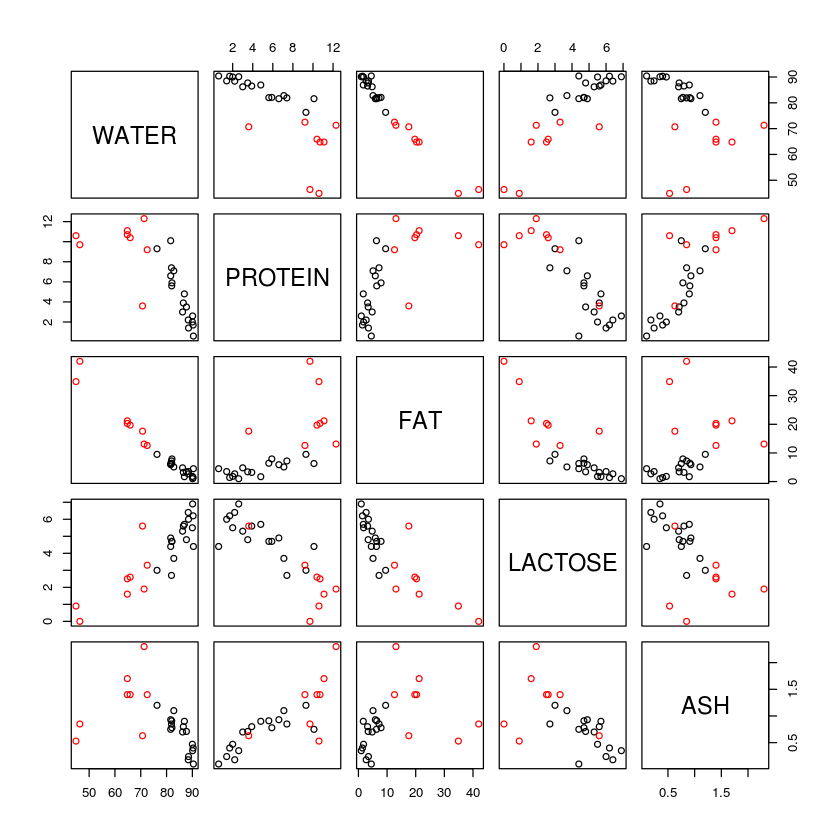

In [26]:
#ingresar valor de k0 
k0=2
cl<-kmeans(datos,k0,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(datos,col=cl$cluster)

Ejercicio 2: Interprete y comente los resultados obtenidos. <br>
<b>R:</b> Se grafian las muestras según por cada par de variables, y se colorean segun el cluster en que hayan sido incluidas. 

,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5
1,1.112848,0.06603277,0.09432454,-0.03162076,0.0008469003
2,-2.364801,-0.14031964,-0.20043965,0.06719411,-0.0017996632


K-means clustering with 2 clusters of sizes 17, 8

Cluster means:
     WATER  PROTEIN       FAT  LACTOSE       ASH
1 85.48824 4.570588  4.488235 4.994118 0.6688235
2 62.66250 9.700000 22.675000 2.300000 1.2762500

Clustering vector:
     HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         1          1          1          1          1          1          1 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         1          1          1          1          1          1          1 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         1          1          1          2          2          2          2 
  REINDEER      WHALE       SEAL    DOLPHIN 
         2          2          2          2 

Within cluster sum of squares by cluster:
[1]  521.8994 1664.9235
 (between_SS / total_SS =  68.8 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] 

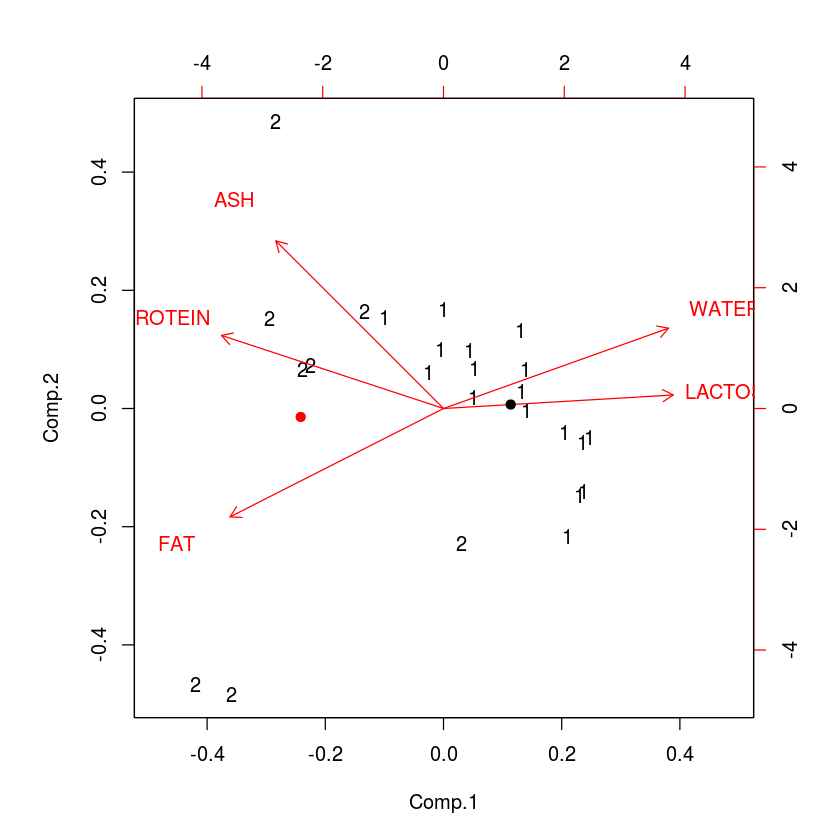

In [27]:
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
res2 <- predict(res,cl$centers)
res2
cl
biplot(res,xlabs=cl$cluster)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:k0,pch=19)


Ejercicio 3: Repita el procedimiento considerando 2 y 4 grupos. Discuta sus resultados.<br>
<b>R:</b>
    <ul><li><b>k=2: </b>El primer grupoes el que tiene más grasa, lactosa y minerales, y el grupo 2 tiene mas grasa, proteinas y minerales.</li>
    <li><b>k=4: </b>El primer grupo es el que tiene más grasa, el segundo el que tiene más minerales y agua, el tercero proteinas y minerales, y el cuarto agua y lactosa.</li></ul>
    

 [1] 4818.266230 1482.419188  362.518278  129.380989   71.398342   31.590708
 [7]   27.191200    5.172000    6.784867   10.984413   27.191200    4.831675
[13]    1.441453    2.958897    5.182453    3.389200    7.035000   -4.843517
[19]    7.048267
[1] 6


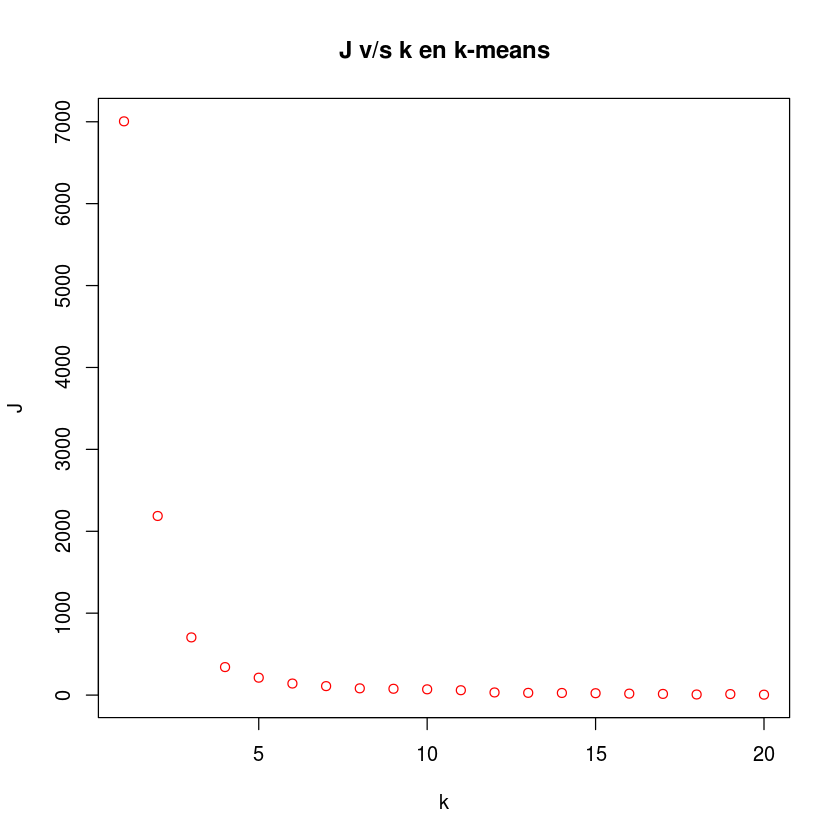

In [49]:
#Estrategia para elegir K, el numero de grupos
#J suma cuadrado de las distancias por cada k utilizado
#K-means
J<-rep(0,20)
pend<-rep(0,19)
fin_iter<-20
mejor_k<-1

for (k in 1:fin_iter){
     cl<-kmeans(datos,k,iter.max=1000,nstart=10)
	 J[k]<-cl$tot.withinss
    if(k>1){
        pend[k-1]<-J[k-1]-J[k]}
}
for (i in 1:19){
    if(pend[i]<100){
        mejor_k<-i+1
        break
    }
    
}
print(pend)
print(mejor_k)

plot(1:fin_iter,J,xlab="k",ylab="J",type="p",main="J v/s k en k-means",col=2) 

Ejercicio 4: de acuerdo al gráfico obtenido, cuál es el valor de K mas apropiado?
Agregue código para automatizar este criterio.<br>
<b>R: </b>Mi criterio es que el primero que tenga una pendiente menor que 100 sera el apropiado.

Ejercicio 5: Realice un análisis de clustering con el conjunto de datos DatosUsoFacebook.csv
Interprete sus resultados.<br>
<b>R: </b> Si usamos un k 3, el primer grupo tiene los atributos R4 y R11 más altos; el segundo grupo tiene los atributos R6, R10, R11, R13 más altos; el tercero tiene los atributos R1, R2, R3, R4, R5, R7, R8, R9, R10, R12 más altos.
Corriendo un for con máximo 50 grupos y un criterio parecido al anterior, pero con un umbral de 20 se obtiene que la cantidad optima de grupos es 13.

In [2]:
datos1 <-read.csv("DatosUsoFacebook.csv", header = TRUE, sep = ";")
summary(datos1)


       R1              R2              R3              R4       
 Min.   :1.000   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:2.000   1st Qu.:2.000   1st Qu.:2.000   1st Qu.:2.000  
 Median :3.000   Median :3.000   Median :3.000   Median :2.000  
 Mean   :2.556   Mean   :2.604   Mean   :2.519   Mean   :2.262  
 3rd Qu.:3.000   3rd Qu.:3.000   3rd Qu.:3.000   3rd Qu.:3.000  
 Max.   :4.000   Max.   :4.000   Max.   :4.000   Max.   :4.000  
       R5              R6              R7              R8       
 Min.   :1.000   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:1.000   1st Qu.:1.000   1st Qu.:2.000   1st Qu.:2.000  
 Median :1.000   Median :2.000   Median :2.000   Median :3.000  
 Mean   :1.348   Mean   :1.882   Mean   :2.374   Mean   :2.642  
 3rd Qu.:2.000   3rd Qu.:2.000   3rd Qu.:3.000   3rd Qu.:3.000  
 Max.   :3.000   Max.   :4.000   Max.   :4.000   Max.   :4.000  
       R9             R10             R11             R12       
 Min.   :1.000   Min.   :

,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6,Comp.7,Comp.8,Comp.9,Comp.10,Comp.11,Comp.12,Comp.13,Comp.14,Comp.15,Comp.16
1,0.7959667,-0.7220099,-0.6982937,-0.3864761,-0.19458641,-0.27924112,0.12623951,0.07254113,-0.03805183,0.21450999,0.002933368,0.10723915,0.06104415,0.03057547,-0.009434872,-0.04502158
2,0.9086447,0.8679466,0.6352719,0.2393738,0.17150220,0.09155807,0.02045736,-0.10026477,0.01532559,-0.28582018,0.034704902,-0.06754560,-0.10400037,-0.06889514,-0.039344300,-0.04402339
3,-1.8452505,-0.1044074,0.1135682,0.1807838,0.03745028,0.21615785,-0.16271464,0.02421527,0.02646159,0.06039309,-0.039750952,-0.04898232,0.04100185,0.03819522,0.051899121,0.09662499


K-means clustering with 3 clusters of sizes 66, 62, 59

Cluster means:
        R1       R2       R3       R4       R5       R6       R7       R8
1 2.833333 2.621212 2.196970 2.181818 1.136364 1.636364 2.227273 2.590909
2 1.983871 2.274194 2.306452 2.193548 1.338710 2.322581 2.145161 2.338710
3 2.847458 2.932203 3.101695 2.423729 1.593220 1.694915 2.779661 3.016949
        R9      R10      R11      R12      R13      R14      R15      R16
1 1.257576 1.984848 3.454545 1.409091 1.651515 1.121212 1.469697 1.136364
2 1.306452 2.096774 3.580645 1.741935 3.096774 1.322581 1.435484 1.241935
3 1.610169 1.779661 2.779661 2.118644 2.728814 1.576271 2.288136 1.627119

Clustering vector:
  [1] 2 1 2 2 2 1 1 2 2 2 2 1 2 3 3 1 2 2 3 3 3 1 3 3 1 1 3 2 1 1 2 3 3 2 2 2 1
 [38] 2 2 2 1 1 3 3 1 1 2 3 2 2 1 2 2 3 3 1 2 3 3 3 1 3 1 1 3 3 1 3 3 3 3 1 1 3
 [75] 1 1 2 1 2 2 1 1 3 3 3 2 2 1 2 3 1 3 1 1 3 2 2 2 3 1 3 2 2 1 2 1 2 2 1 2 3
[112] 3 2 3 1 2 3 1 1 1 2 1 1 1 1 1 1 3 2 2 3 2 3 2 3 3 3 3 2 2 1 1 2 3 2 1 3

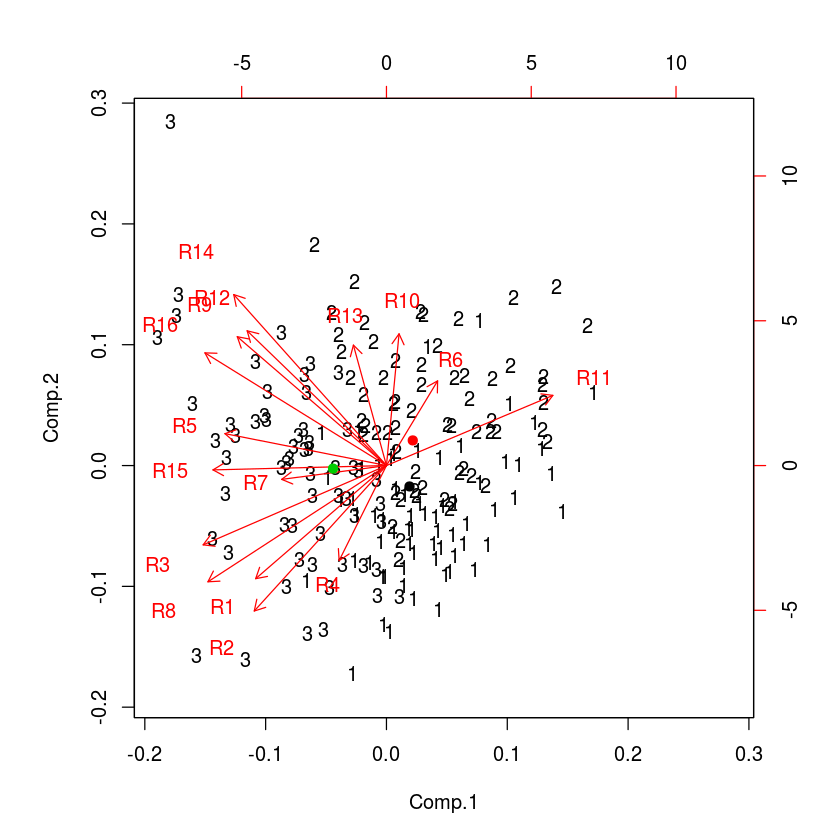

In [21]:
#ingresar valor de k0 
k0=3
cl<-kmeans(datos1,k0,iter.max=10000,nstart=10)

res <- princomp(datos1, cor=TRUE)
res2 <- predict(res,cl$centers)
res2
cl
biplot(res,xlabs=cl$cluster)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:k0,pch=19)

Warning message:
“did not converge in 10000 iterations”Warning message:
“did not converge in 10000 iterations”Warning message:
“did not converge in 10000 iterations”Warning message:
“did not converge in 10000 iterations”Warning message:
“did not converge in 10000 iterations”Warning message:
“did not converge in 10000 iterations”

 [1] 186.696800 102.349255  79.893448  64.450151  53.648502  37.493072
 [7]  33.031248  31.299153  31.356586  23.861865  26.367333  18.507670
[13]  23.283153  17.979879  19.856404  21.721829  14.838947  12.037039
[19]  19.138331  19.651111  10.111156  16.516471  19.978820  14.456513
[25]   6.592838  16.431946  16.475536  15.716059  10.699495   9.582107
[31]  10.893717  13.254190  11.518362  13.902783   4.704107  13.456638
[37]  11.186472  10.332973  10.303680   9.727814   6.518398  13.403680
[43]   9.673341  10.649675   3.157937   9.275649   8.145779   5.479654
[49]  14.199892
[1] 13


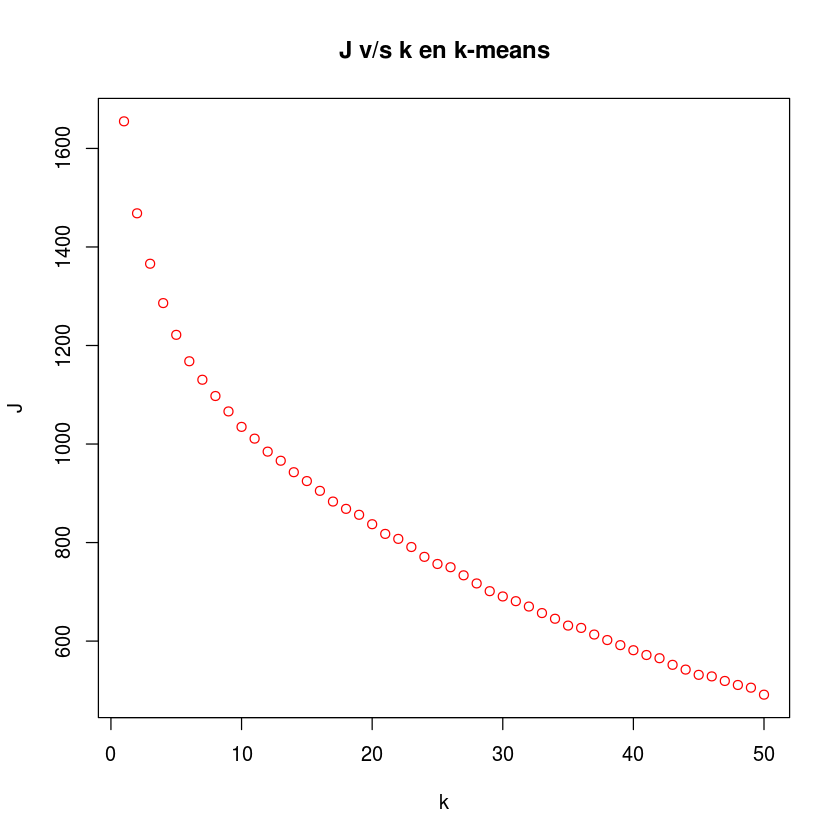

In [16]:
#Estrategia para elegir K, el numero de grupos
#J suma cuadrado de las distancias por cada k utilizado
#K-means
J<-rep(0,50)
pend<-rep(0,49)
fin_iter<-50
mejor_k<-1

for (k in 1:fin_iter){
     cl<-kmeans(datos1,k,iter.max=10000,nstart=10)
	 J[k]<-cl$tot.withinss
    if(k>1){
        pend[k-1]<-J[k-1]-J[k]}
}
for (i in 1:49){
    if(pend[i]<20){
        mejor_k<-i+1
        break
    }
    
}
print(pend)
print(mejor_k)
plot(1:fin_iter,J,xlab="k",ylab="J",type="p",main="J v/s k en k-means",col=2) 